In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#SKLEARN IMPORTS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

# **Loading Data**

In [4]:
#LOADING THE DATA
taxi_data_path = '/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv'
taxi_data = pd.read_csv(taxi_data_path)

# **Data Exploration and Preprocessing**

# Exploratory Data Analysis (EDA)

In [5]:
#checking shape of data
taxi_data.shape

(175000, 17)

In [6]:
#EXAMINING THE DATA
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


* In the first and second row pickup time and dropoff time is not correct. 
    eg. Pickup time(17:20) is given after dropoff time(16:34) on 28-06-23.

In [7]:
#checking the taxi_data
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [8]:
#statistics
taxi_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [9]:
#checking for null values
taxi_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [10]:
#total number of vendors
taxi_data['VendorID'].value_counts()

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

# Data Vizualization

<Axes: xlabel='total_amount'>

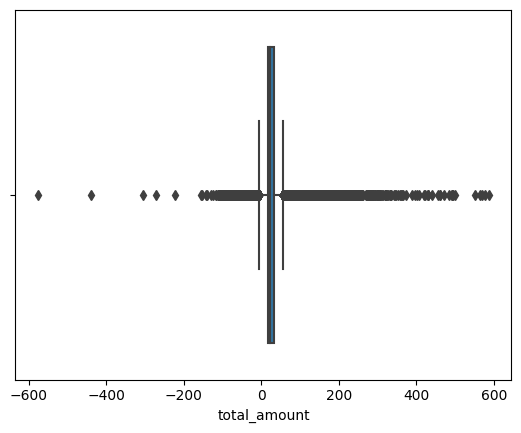

In [11]:
# Boxplot of total_amount by payment_type 
sns.boxplot(x='total_amount', data=taxi_data)

Text(0.5, 1.0, 'Distribution of Total Fare Amounts')

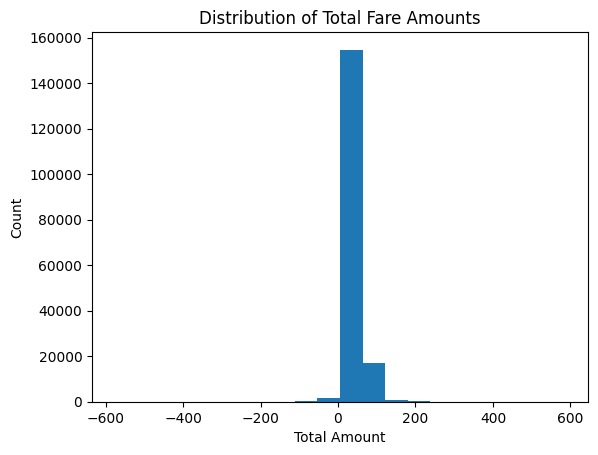

In [12]:
# Histogram of total_amount
plt.hist(taxi_data['total_amount'], bins=20)
plt.xlabel('Total Amount'); plt.ylabel('Count')
plt.title('Distribution of Total Fare Amounts')

Text(0, 0.5, 'Trip Distance')

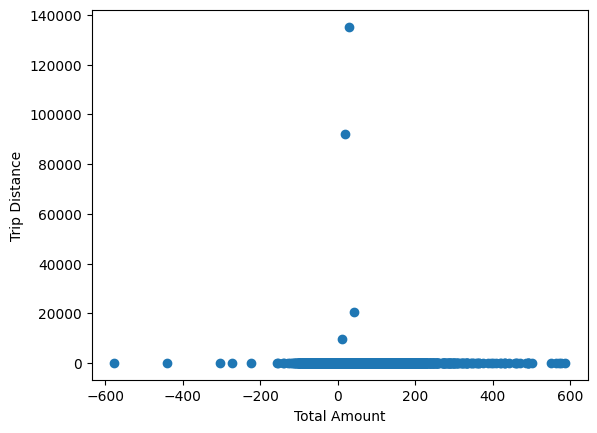

In [13]:
# Scatterplot of total_amount vs trip distance
plt.scatter(taxi_data['total_amount'], taxi_data['trip_distance'])
plt.xlabel('Total Amount'); plt.ylabel('Trip Distance')

In [14]:
# Boxplot of total_amount by trip_distance 
# sns.boxplot(x='trip_distance', y='total_amount', data=taxi_data)

<Axes: xlabel='payment_type', ylabel='total_amount'>

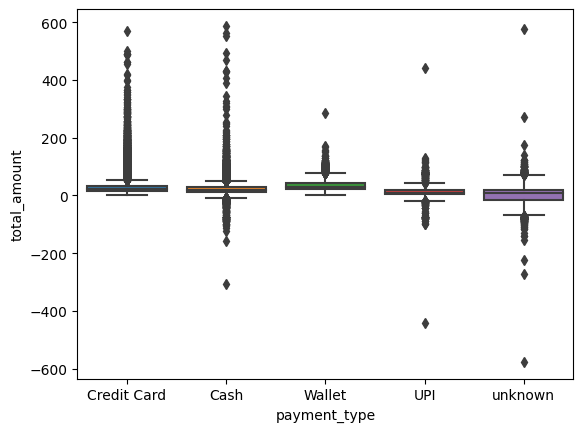

In [15]:
# Boxplot of total_amount by payment_type 
sns.boxplot(x='payment_type', y='total_amount', data=taxi_data)

<Axes: xlabel='pickup_date'>

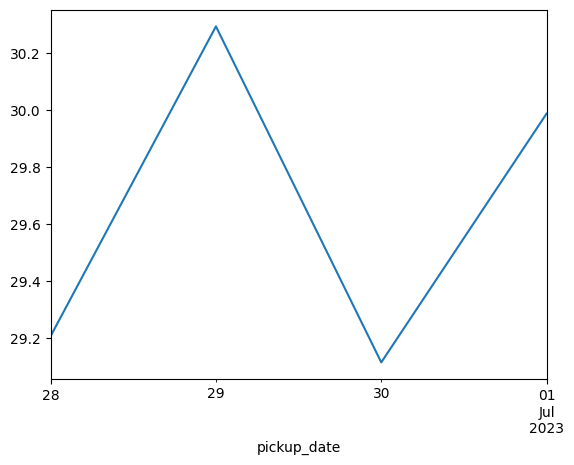

In [16]:
# Line plot of total_amount over time
taxi_data['pickup_date'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data.set_index('pickup_date', inplace=True)
taxi_data.resample('D')['total_amount'].mean().plot()

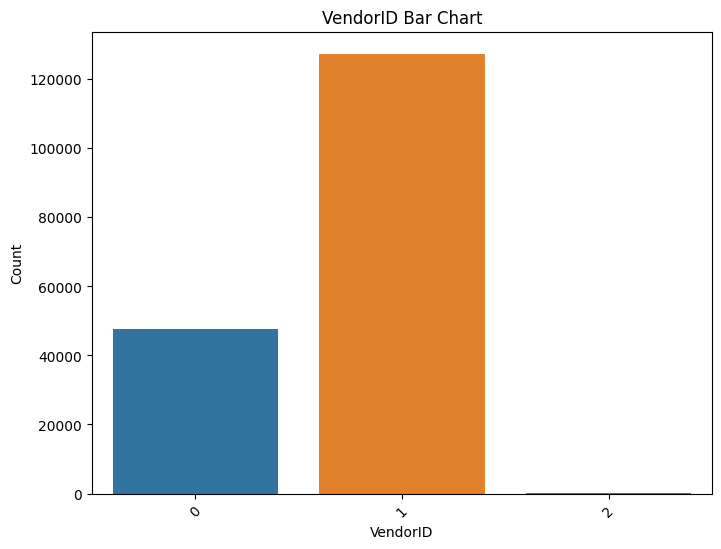

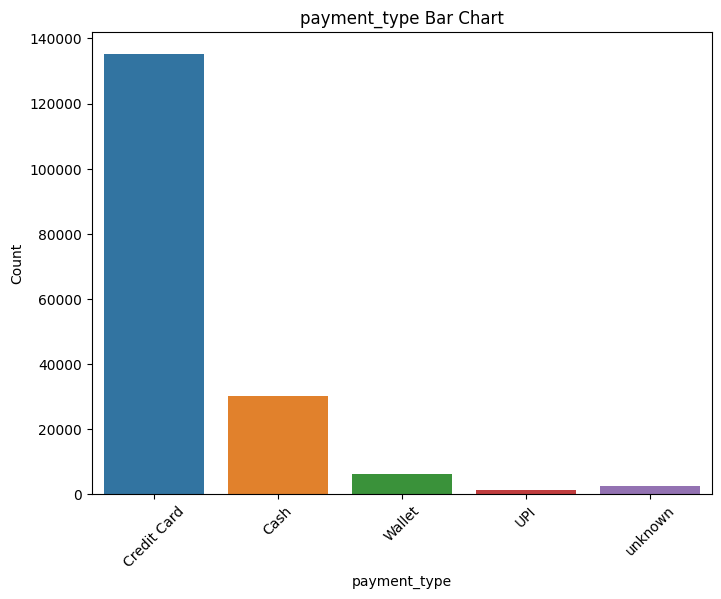

In [17]:
#Total no. of trips by each vendor
categorical_columns = ['VendorID', 'payment_type']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=taxi_data, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Bar Chart')
    plt.xticks(rotation=45)
    plt.show()

In [18]:
# # Correlation matrix 
# sns.heatmap(taxi_data.corr(), annot=True)

***OBSERVATION:***
* Vendor 1 has got more number of customers.
* Credit card is the most used payment type.

In [19]:
#Imputating numerical values
# missing_cols = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'Airport_fee']
# for col in missing_cols:
#     if col in taxi_data.columns:
#         if taxi_data[col].dtype == 'object':
#             imputer = SimpleImputer(strategy='most_frequent')
#         else:
#             imputer = SimpleImputer(strategy='mean')
#         taxi_data[col] = imputer.fit_transform(taxi_data[[col]])[:, 0]
#     else:
#         print(f"Column '{col}' not found in the Data.")

# **Feature Engineering**

* First trying to convert pickup and dropoff datetime values in datetime format and then extracting days, hour and seconds from it.
* Then dropping original datetime values and imputing missing values.
* After Imputation feature scaling has been done using standardscaler for numerical features and OneHotEncoder for categorical features.
* Columns are being transformed using ColumnTransformer.

In [20]:
#Feature Engineering
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

taxi_data['pickup_day'] = taxi_data['tpep_pickup_datetime'].dt.dayofweek
taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour
taxi_data['trip_duration_minutes'] = (taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60


In [21]:
#Dropping columns 'tpep_pickup_datetime', 'tpep_dropoff_datetime'
data = taxi_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

**Imputing Missing Values**

In [22]:
#Dividing data in categorical columns and numerical columns
categorical_cols = ['store_and_fwd_flag', 'payment_type']
numerical_cols = [col for col in data.columns if col not in categorical_cols and col != 'total_amount']

In [23]:
#Transforming and preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [24]:
# Applying transformers to columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Train-Test Split**

* Splitting data in training and test sets with 20% size of dataset being alloted to test set with RandomState 48. 

In [25]:
#Diving data into features and labels
X = data.drop(['total_amount'], axis =1)
y = data['total_amount']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 48)

In [27]:
X_train.shape, X_test.shape

((140000, 17), (35000, 17))

In [28]:
# Correlation matrix 
# sns.heatmap(data.corr(), annot=True)

# **Model Selection and Training**

*Implement KNeighborsRegressor and DecisionTreeRegressor*

**Model 1. Linear Regression**

* The first model being trained here is Linear Regression and R2 Score from that model is 0.7137.

In [29]:
# LINEAR REGRESSION
lin_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])
# Fitting the model
lin_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'pickup_day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor', LinearRegression())])

In [30]:
#R2 Score on X_test
y_pred = lin_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score from Linear Regression: {r_squared}')

R-squared (R2) Score from Linear Regression: 0.7137794131451405


**Model 2. Random Forest Regressor**

* The second model being trained here is Random Forest Regression and R2 Score from that model is 0.9482.
* The r2 score on validation set from RandomForest model is 0.94183.
* We can see that there is not a significant difference between training data score and test data prediction so there is no case of **"Overfitting"**
* This is the 3rd best performing model.

In [31]:
# RANDOM FOREST REGRESSION
rf_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state = 48))])
# Fitting the model
rf_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'pickup_day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor', RandomForestRegressor(random_state=48))])

In [32]:
#R2 Score on X_test
y_pred = rf_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score from Random Forest Regressor before HPT: {r_squared}')

R-squared (R2) Score from Random Forest Regressor before HPT: 0.9482434497873485


**HPT for RandomForest**

In [33]:
# # RANDOM FOREST REGRESSION With GSCV Hyperparameters
# rf_reg_gs = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('regressor', RandomForestRegressor(random_state = 48))])

# param_grid = {
#     'regressor__n_estimators': [50, 100, 200],
#     'regressor__max_depth': [None, 10, 20, 30],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4],
#     'regressor__max_features': ['auto', 'sqrt', 'log2']
# }


# grid_search_rf = GridSearchCV(estimator=rf_reg_gs, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1, scoring='r2')

# # Fitting the model with the training data
# grid_search_rf.fit(X_train, y_train)


# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search_rf.best_params_)

In [34]:
# #PREDICTION

# #R2 Score on X_test
# y_pred_rf_gridSearch = grid_search_rf.predict(X_test)

# r_squared = r2_score(y_test, y_pred)
# print(f'R-squared (R2) Score from Random Forest Regressor using GridSearchCV: {r_squared}')

**Prediction on Best Hyperparameter**
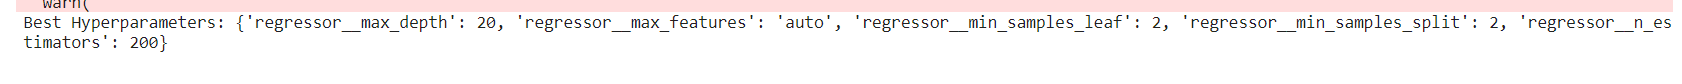

In [35]:
#Prediction on best RandomForest Model

best_random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor(max_features = 'auto', max_depth = 20, min_samples_leaf = 2,
                                                                         min_samples_split = 2, n_estimators = 200, random_state=48))])

best_random_forest.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'p...day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, max_features='auto',
                                       min_samples_leaf=2, n_estimators=200,
                                       random_state=48))])

In [36]:
#Prediction on Best RandomForest Using GSCV

best_y_pred_rf = best_random_forest.predict(X_test)

r_squared = r2_score(y_test, best_y_pred_rf)
print(f'R-squared (R2) Score from Best Random Forest Regressor: {r_squared}')

R-squared (R2) Score from Best Random Forest Regressor: 0.949011133974517


**Model 3. Support Vector Regressor**

In [37]:
# Support Vector Regressor
sv_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])
# Fitting the model
sv_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'pickup_day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor', SVR())])

In [38]:
#R2 Score on X_test
y_pred = sv_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score from Support Vector Regressor: {r_squared}')

R-squared (R2) Score from Support Vector Regressor: 0.7446855285963394


**Model 4. Lasso Regressor**

In [39]:
# Lasso Regressor
lasso_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', Lasso())])
# Fitting the model
lasso_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'pickup_day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor', Lasso())])

In [40]:
#R2 Score on X_test
y_pred = lasso_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score from Lasso Regressor: {r_squared}')

R-squared (R2) Score from Lasso Regressor: 0.7060197820998579


**Model 5. Ridge Regression**

In [41]:
# Ridge Regressor
ridge_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', Ridge())])
# Fitting the model
ridge_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'pickup_day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor', Ridge())])

In [42]:
#R2 Score on X_test
y_pred = ridge_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score from Ridge Regressor: {r_squared}')

R-squared (R2) Score from Ridge Regressor: 0.7137799104224172


**Model 6. Gradient Boosting Regressor**

In [43]:
# # Gradient Boosting Regressor
# gb_reg = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('regressor', GradientBoostingRegressor(random_state=48))])

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [3, 4, 5],
#     'regressor__learning_rate': [0.1,0.2, 0.05],
# }

# gb_reg_gs = GridSearchCV(gb_reg, param_grid, cv=3, n_jobs=-1, scoring='r2')

# # Fitting the model
# gb_reg_gs.fit(X_train, y_train)

In [44]:
# # R2 Score on X_test
# y_pred_grid_search = best_regressor.predict(X_test)

# r_squared = r2_score(y_test, y_pred)
# # print("Best Regressor : ", best_regressor)
# print(f'Best Model R-squared (R2) Score: {r_squared}')

**Best Estimator For Gradient Boosting Algorithm**

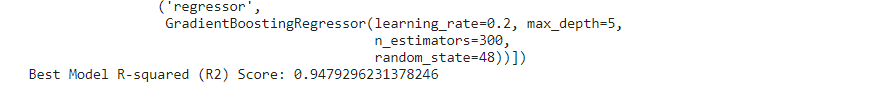

In [45]:
#Best GradientBoosting Regressor using GridSearchCV
best_grad_boost_reg = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', GradientBoostingRegressor(learning_rate = 0.2, max_depth = 5,
                                                                            n_estimators = 300, random_state=48))])

# Fitting the model
best_grad_boost_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'pickup_day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=5,
                                           n_estimators=300,
                                           random_state=48))])

In [46]:
#Prediction on Best Estimators for Gradient Boosting Regressor
#R2 Score on X_test
best_y_gradient_boost = best_grad_boost_reg.predict(X_test)

r_squared = r2_score(y_test, best_y_gradient_boost)
print(f'R-squared (R2) Score from Best Gradient Boosting Regressor: {r_squared}')

R-squared (R2) Score from Best Gradient Boosting Regressor: 0.9479296231378246


**Model 7. AdaBoost Regression**

In [47]:
# AdaBoost Regressor 
adb_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', AdaBoostRegressor(random_state=48))])
# Fitting the model
adb_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'pickup_day',
                                                   'pickup_hour',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])])),
                ('regressor', AdaBoostRegressor(random_state=48))])

In [48]:
#R2 Score on X_test
y_pred = adb_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score from AdaBoost Regressor: {r_squared}')

R-squared (R2) Score from AdaBoost Regressor: 0.5408625000727006


**Model 8. XGBoost Regressor**

In [49]:
# # XGBoost Regressor 
# xgb_reg = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('regressor', XGBRegressor(random_state=48))])

# # XGBoost with GridSearch CV
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],   
#     'regressor__learning_rate': [0.01, 0.1, 0.2],  
#     'regressor__max_depth': [3, 4, 5],          
#     'regressor__subsample': [0.8, 0.9, 1.0],    
#     'regressor__colsample_bytree': [0.8, 0.9, 1.0] 
# }


# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')


# # Fitting the model
# grid_search.fit(X_train, y_train)

In [50]:
# #R2 Score on X_test
# y_pred = best_xgb_reg.predict(X_test)

# r_squared = r2_score(y_test, y_pred)
# print("Best Hyperparameters:", grid_search.best_params_)
# print(f'R-squared (R2) Score from XGBoost Regressor: {r_squared}')

**XGB MODEL TRAINING AND PREDICTION ON BEST HYPERPARAMETERS**

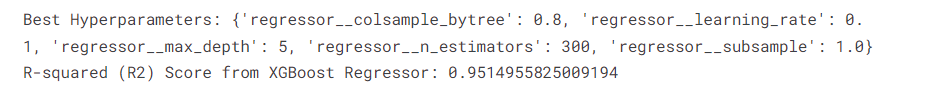

In [51]:
#Prediction on best hyperparameters (XGB Regressor)

best_xgb_reg_gs = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', XGBRegressor(learning_rate = 0.1, max_depth = 5,
                                                                colsample_bytree = 0.8, subsample = 1.0,
                                                                            n_estimators = 300, random_state=48))])

# Fitting the model
best_xgb_reg_gs.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'p...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=48, ...))])

In [52]:
#R2 Score on X_test
y_pred_xgb = best_xgb_reg_gs.predict(X_test)

r_squared = r2_score(y_test, y_pred_xgb)

print(f'R-squared (R2) Score from Best XGBoost Regressor using GridSearchCV: {r_squared}')

R-squared (R2) Score from Best XGBoost Regressor using GridSearchCV: 0.9514955825009194


**Hyperparameter Tuning for XGB Regressor using RandomizedSearchCV**

In [53]:
# # XGB Regressor Using Randomized Search CV

# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'regressor__n_estimators': np.arange(100, 1000, 50),  
#     'regressor__learning_rate': [0.01, 0.1, 0.2],  
#     'regressor__max_depth': np.arange(5, 10, 1),  
#     'regressor__subsample': [0.8, 0.9, 1.0],
#     'regressor__colsample_bytree': [0.8, 0.9, 1.0],  
#     'regressor__reg_alpha': [0.001, 0.01, 0.1],  
#     'regressor__reg_lambda': [0.001, 0.01, 0.1]  
# }

# xgb_reg_rscv = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('regressor', XGBRegressor(random_state=48))])


# random_search = RandomizedSearchCV(estimator=xgb_reg_rscv, param_distributions=params, n_iter=50, verbose=2,
#                                    cv=3, n_jobs=-1, scoring='r2', random_state=48)

# # Fitting the model
# random_search.fit(X_train, y_train)

In [54]:
# #R2 Score on X_test
# y_pred_rscv_xgb = random_search.predict(X_test)

# r_squared = r2_score(y_test, y_pred_rscv_xgb)
# print("Best Hyperparameters:", random_search.best_params_)
# print(f'R-squared (R2) Score from XGBoost Regressor: {r_squared}')

* R2 Score on XGB Regressor using RandomizedSearchCV = 0.9508985200053464

**PREDICTION ON BEST HYPERPARAMETERS (XGB USING RS CV)**
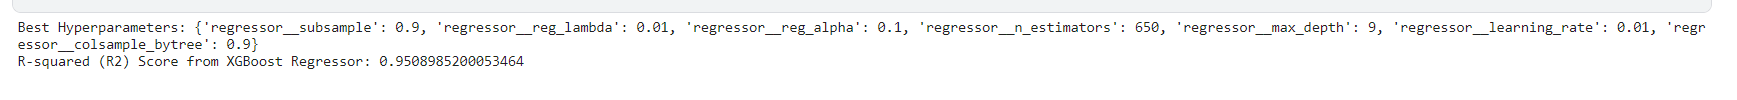

In [55]:
best_xgb_rscv = Pipeline(steps = [('preprocessor', preprocessor),
                                 ('regressor', XGBRegressor(subsample=0.9, reg_lambda=0.01, alpha=0.1, n_estimators=650, max_depth=9, learning_rate=0.01, colsample_bytree=0.9, random_state=48))])

#Fitting the model
best_xgb_rscv.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'RatecodeID', 'PULocationID',
                                                   'DOLocationID', 'extra',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'congestion_surcharge',
                                                   'Airport_fee', 'p...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=650,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, ...))])

In [56]:
#Prediction
y_pred_best_xgb_rscv = best_xgb_rscv.predict(X_test)

#Scoring
r_sq_score = r2_score(y_test, y_pred_best_xgb_rscv)

# Printing Score
print(f'R-squared (R2) Score from Best XGBoost Regressor using RandomizedSearchCV: {r_sq_score}')

R-squared (R2) Score from Best XGBoost Regressor using RandomizedSearchCV: 0.9508985200053464


In [57]:
# Mean Squared Error comparison

from sklearn.metrics import mean_squared_error

# RandomForest (Best RF)
mse_rf = mean_squared_error(y_test, best_y_pred_rf)

#GradientBoosting
mse_gb = mean_squared_error(y_test, best_y_gradient_boost)

#XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean squared error for RandomForestRegressor is {mse_rf}, GradientBosstingRegressor is {mse_gb}, and XGBRegressor is {mse_xgb}")

Mean squared error for RandomForestRegressor is 32.4946780740581, GradientBosstingRegressor is 33.18391376826559, and XGBRegressor is 30.91136466958532


* Mean squared error for RandomForestRegressor is 32.4946780740581, GradientBosstingRegressor is 33.18391376826559, and XGBRegressor is 30.91136466958532
* Here we can see that evcen for the mean squarred error XGBRegressor performs better than the other two. 

**Comparing the best 3 models - XGBRegressor, RandomForestRegressor, GradientBoostingRegressor**
* Here train_test_split data is being used to see the performance of models on training set.

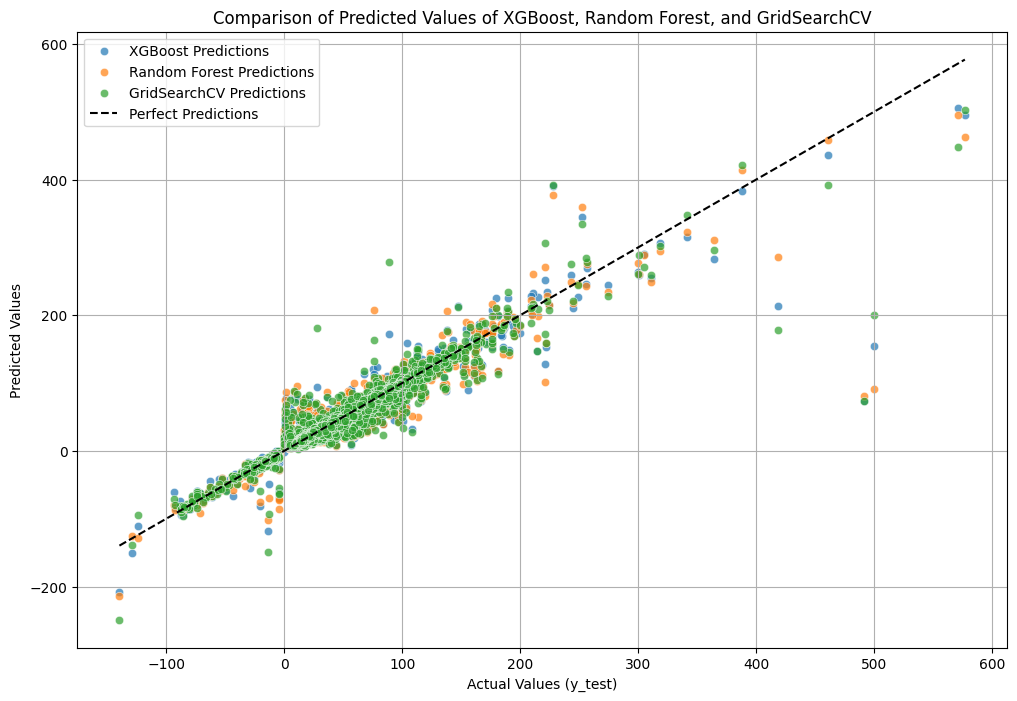

In [58]:
plt.figure(figsize=(12, 8))

# Scatter plot for XGBoost predictions
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost Predictions', alpha=0.7)

# Scatter plot for Random Forest predictions
sns.scatterplot(x=y_test, y=best_y_pred_rf, label='Random Forest Predictions', alpha=0.7)

# Scatter plot for GridSearchCV predictions 
sns.scatterplot(x=y_test, y=best_y_gradient_boost, label='GridSearchCV Predictions', alpha=0.7)

# Line for perfect predictions
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], linestyle='--', color='k', label='Perfect Predictions')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values of XGBoost, Random Forest, and GridSearchCV')
plt.legend()
plt.grid(True)
plt.show()


# **Submission**

***Loading test.csv***

In [59]:
#LOADING test.csv file
test_data_path='/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv'
test_data=pd.read_csv(test_data_path) 

#SHAPE OF test.csv
test_data.shape

(50000, 16)

In [60]:
#SEARCHING FOR NULL VALUES
test_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [61]:
#statistics
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,50000.000000,48221.000000,50000.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000
mean,0.730280,1.358309,3.999013,1.567014,132.208160,132.559300,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133
std,0.444584,0.879948,78.958759,6.875115,76.483766,76.410602,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000
25%,0.000000,1.000000,1.090000,1.000000,66.000000,67.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.850000,1.000000,132.000000,133.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,3.600000,1.000000,199.000000,199.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000
max,2.000000,8.000000,17624.430000,99.000000,264.000000,264.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000


In [62]:
#Feature Engineering
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])

test_data['pickup_day'] = test_data['tpep_pickup_datetime'].dt.dayofweek
test_data['pickup_hour'] = test_data['tpep_pickup_datetime'].dt.hour
test_data['trip_duration_minutes'] = (test_data['tpep_dropoff_datetime'] - test_data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [63]:
#Dropping columns 'tpep_pickup_datetime', 'tpep_dropoff_datetime'
test_data_2 = test_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

Identifying Categorical and numerical features for Imputation

In [64]:
#Dividing data in categorical columns and numerical columns
test_categorical_cols = ['store_and_fwd_flag', 'payment_type']
test_numerical_cols = [col for col in test_data_2.columns if col not in test_categorical_cols]

In [65]:
#Transforming and preprocessing
test_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

test_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [66]:
# Applying transformers to columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', test_numerical_transformer, test_numerical_cols),
        ('cat', test_categorical_transformer, test_categorical_cols)
    ])

In [67]:
#Prediction on BEST XGB Regressior With GSCV
y_test_pred = best_xgb_reg_gs.predict(test_data_2)

In [68]:
# Generating Submission File
submission_df = pd.DataFrame({
    'ID': test_data_2.index + 1, 
    'total_amount': y_test_pred
})

submission_df.to_csv('submission.csv', index=False)

**Best Scores**
1. Random Forest Regressor = 0.94183.
2. Gradient Bossting Regressor with GridSearch CV = 0.94681
3. XGBoost with GridSearch CV = 0.94681 after HPT = 0.94857
4. XGBoost with RandomizedSearch CV = 0.94426